In order to train a deep learning model, typically a large size of labeled examples are necessary. To increase the number of training examples, there are methods for *data augmentation*. These typically consist of random rotations, shifts and scalings of input images.

The Keras library comes with a data augmentation module.

In [1]:
%matplotlib inline    
#displays images in the notebook rather than a separate window
from scipy.misc import imread, imresize #reading and resizing images
import matplotlib.pyplot as plt #displaying images
import dask.bag as db  #For easy parallelizatoin of applying a function on a list
import pandas as pd
import glob #getting the list of files in a directory
import numpy as np
import pickle #use pickle for serializing Python objects to disk
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
((X_train, y_train), (X_test, y_test)) =  pickle.load(open('driver_images_processed.pckl', 'rb'))


In [3]:
datagen = ImageDataGenerator(
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,
        shear_range = 5*2*np.pi/360,
        zoom_range = 0.05) 

In [4]:
transformed = datagen.flow(X_train[:1,...], y_train[:1, ...], batch_size = 100)

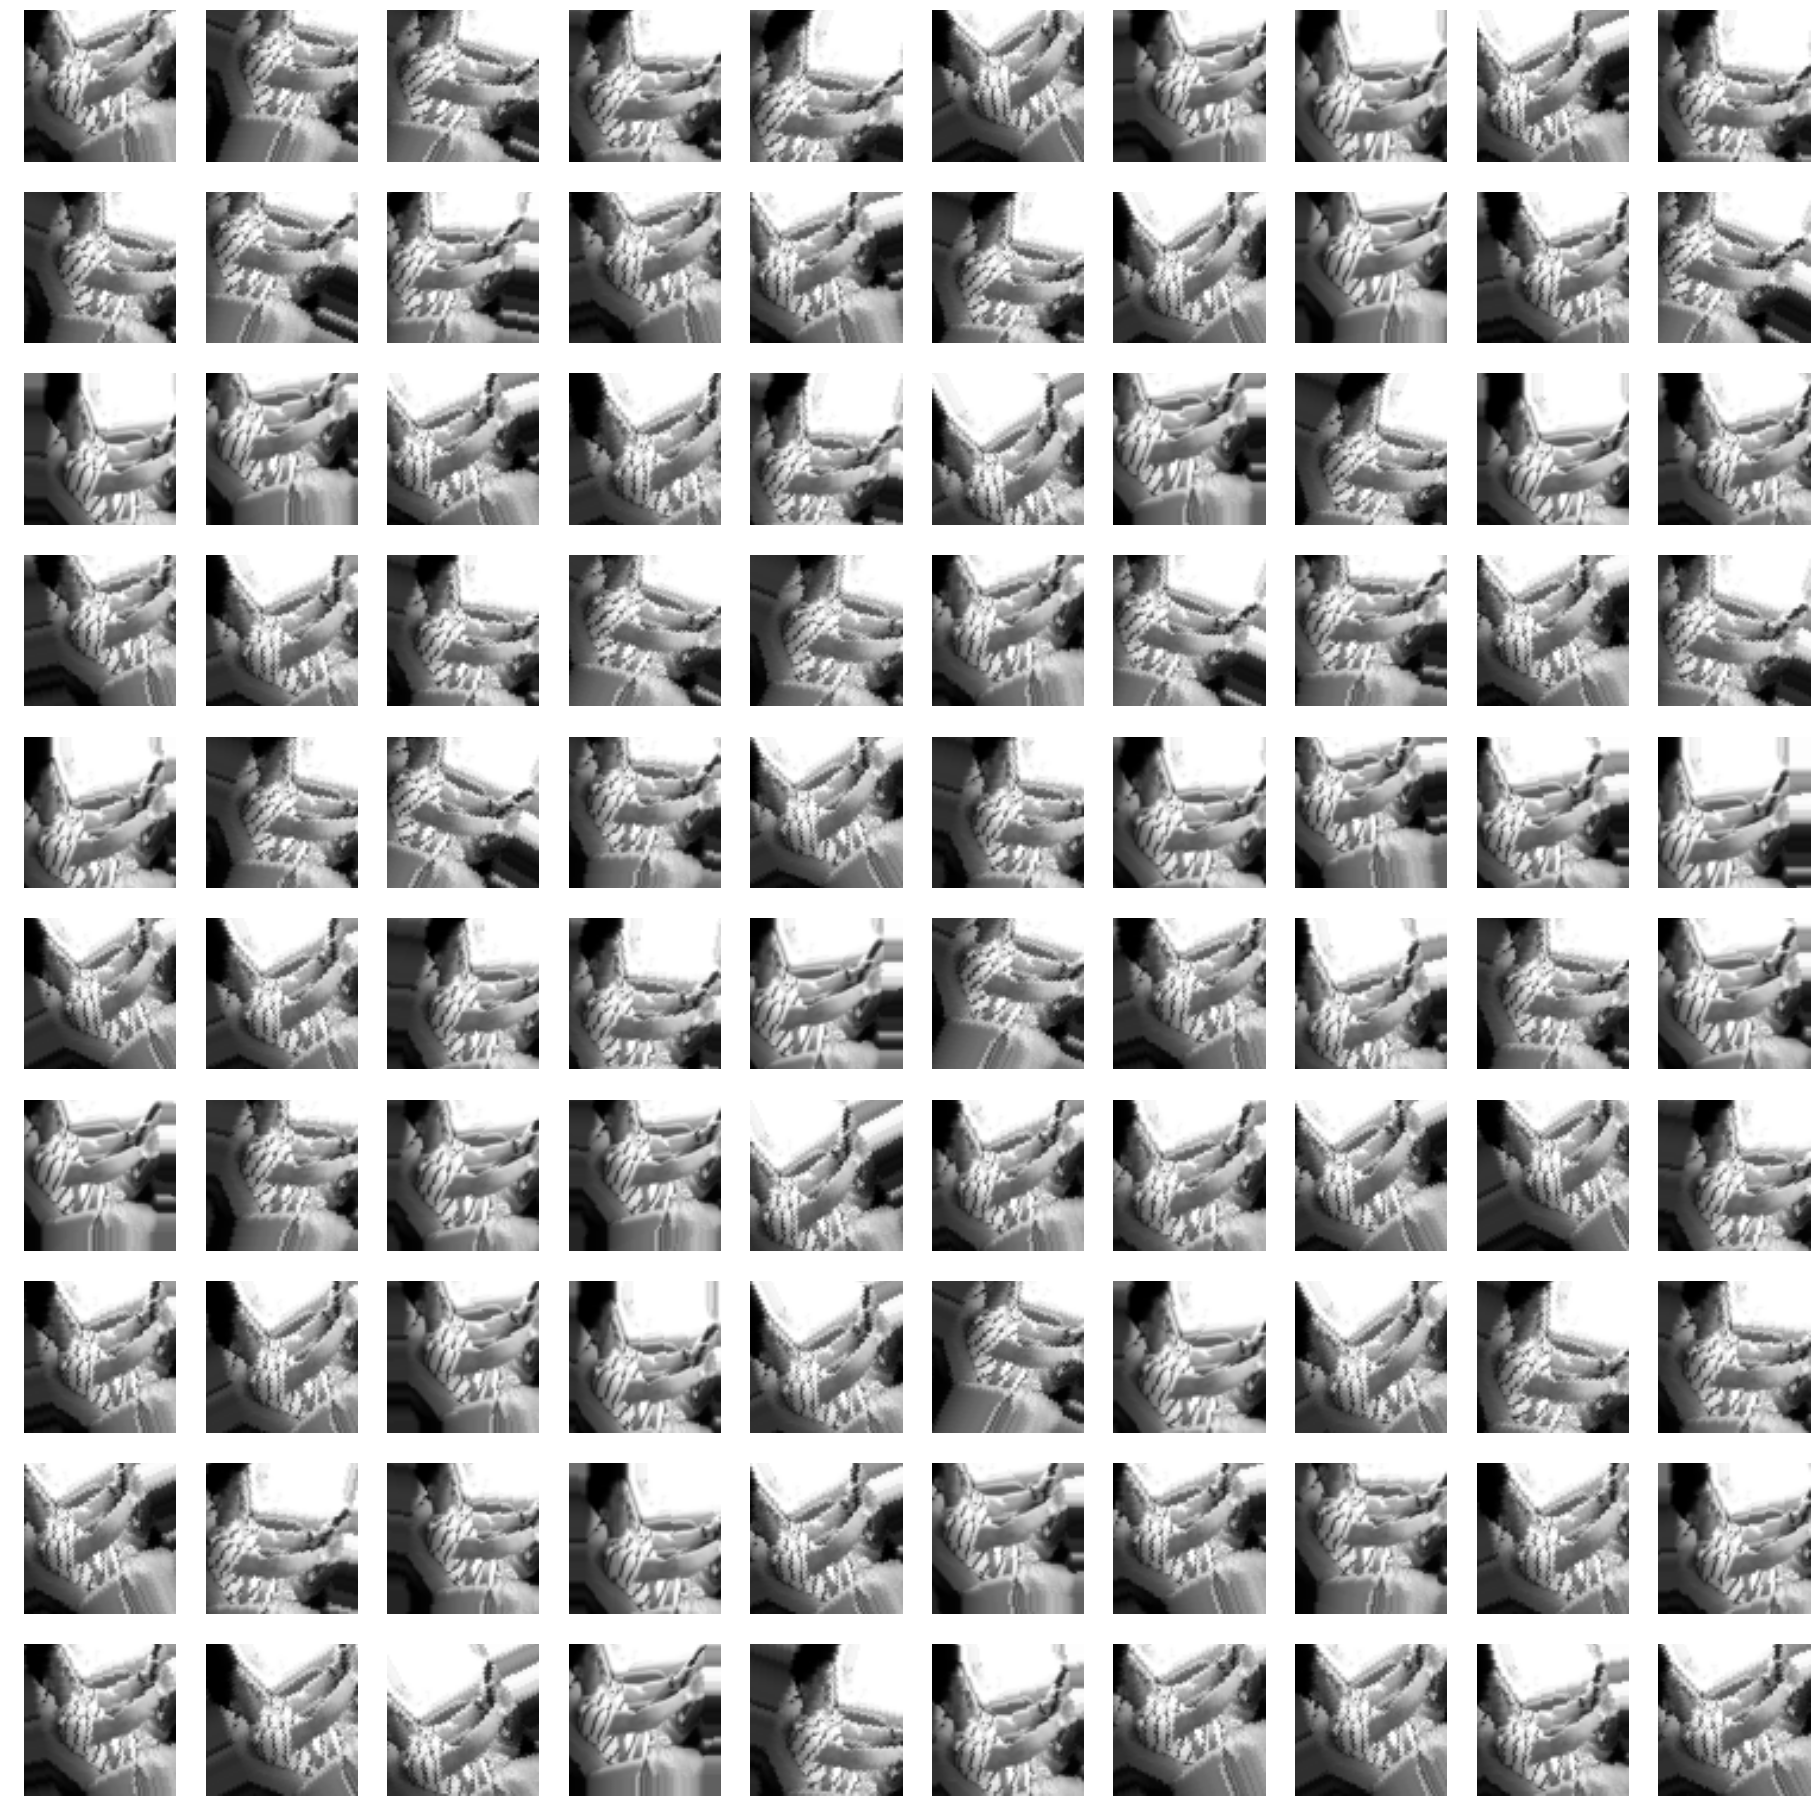

In [5]:
plt.figure(figsize=(32, 32))
for i in range(100):
    new_image  = next(transformed)[0][0, :, :, 0]
    plt.subplot(10, 10, i+1)
    plt.imshow(new_image, cmap='gray')
    plt.axis('off')